In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
def plot_figs(data = ([0],), labels = (["Eixo x", "Eixo y"]), colors = ["r"], title = "No title", figsize = (10, 10), save_path = ["./no_path_fig.png"]):
    fig, ax = plt.subplots(nrows=len(data), ncols=1, figsize=figsize)
    plt.suptitle(title)
    
    for i in range(len(data)):
        ax[i].plot(data[i][0],
                   data[i][1],
                   color=colors[i])
        
        ax[i].set_xlabel(labels[i][0])
        ax[i].set_ylabel(labels[i][1])
    
    fig.savefig(save_path, dpi=100)
    plt.show(fig)

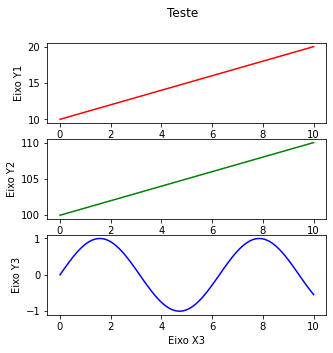

In [64]:
x = np.linspace(0, 10, 100)
y = lambda x, b: x + b

data = ([x, y(x, 10)], [x, y(x, 100)], [x, np.sin(x)])
data2 = ([x, y(x, 10)],)

plot_figs(data = data,
          colors = ["r", "g", "b"],
          title = "Teste",
          figsize = (5, 5),
          labels = (["Eixo X1", "Eixo Y1"], ["Eixo X2", "Eixo Y2"], ["Eixo X3", "Eixo Y3"]),
          save_path = './figura_salva.png')

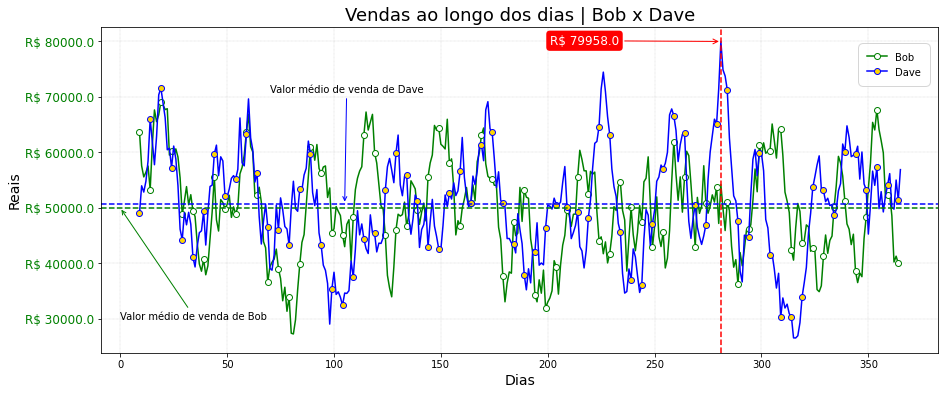

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("assets/salesman_pivot.csv")
bob = df["Bob"].rolling(10).sum().dropna()
dave = df["Dave"].rolling(10).sum().dropna()

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(bob, color="g", label="Bob")
ax.plot(dave, color="b", label="Dave")
ax.legend()
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set_title('Vendas ao longo dos dias | Bob x Dave', size=18)
ax.set_xlabel('Dias', size=14)
ax.set_ylabel('Reais', size=14)

from matplotlib.ticker import StrMethodFormatter
ax.tick_params(axis='y', labelsize=12, labelcolor='green') # alterando a cor dos ticks do eixo Y

fmt = StrMethodFormatter("R$ {x}") # criando um formatador para inserir R$ no eixo Y
ax.yaxis.set_major_formatter(fmt) # aplicando o formatodor

bob_curve = ax.lines[0] # Selecionando a curva do bob de dentro das linhas do Axes
bob_curve.set_marker('o') # Adicionando um marcador em formato de bolinha
bob_curve.set_markevery(5) # Amostrando o marcador para criar a bolinha a cada 5 dias
bob_curve.set_markerfacecolor('white') # Fazendo a bolinha ficar branca

dave_curve = ax.lines[1] # Selecionando a curva do bob de dentro das linhas do Axes
dave_curve.set_marker('o') # Adicionando um marcador em formato de bolinha
dave_curve.set_markevery(5) # Amostrando o marcador para criar a bolinha a cada 5 dias
dave_curve.set_markerfacecolor('gold') # Fazendo a bolinha ficar branca

ax.legend()

ax.legend_.set_bbox_to_anchor([0.99, 0.95]) # movendo a posição da legenda
ax.legend_.legendPatch.set_boxstyle('round, pad=0.5') # deixando as bordas arredondadas

avg_bob = bob.mean()
avg_dave = dave.mean()

ax.axhline(avg_bob, color='green', ls='dashed') # criando a linha horizontal para bob
ax.axhline(avg_dave, color='blue', ls='dashed') # criando a linha horizontal para dave

day_max = dave.idxmax() if dave.max() > bob.max() else bob.idxmax()
val_day_max = max([dave.max(), bob.max()])
ax.axvline(day_max, color='red', ls='dashed') # criando a linha vertical para o dia de venda maxima

max_annotation = ax.annotate(f"R$ {val_day_max}", # valor gerado para a notação
                             xy=(day_max, val_day_max), # posição para onde a anotação deve apontar
                             xytext=(day_max-80, val_day_max-500), # posição onde  fica o texto da anotação
                             arrowprops=dict(arrowstyle='->', color="r") # estilo da seta
                            )

max_annotation.set(size=12, color='w')
max_annotation.set_bbox(dict(facecolor='r', boxstyle='round, pad=0.3', lw=0))

bob_mean_annotation = ax.annotate("Valor médio de venda de Bob",
                                  xy=(0, bob.mean()),
                                  xytext=(0, bob.mean() - 20000),
                                  arrowprops=dict(arrowstyle='->', color="green"))

dave_mean_annotation = ax.annotate("Valor médio de venda de Dave",
                                  xy=(105, dave.mean()),
                                  xytext=(105 - 35, dave.mean() + 20000),
                                  arrowprops=dict(arrowstyle='->', color="blue"))

fig.savefig("bob_X_dave.png", dpi=200)

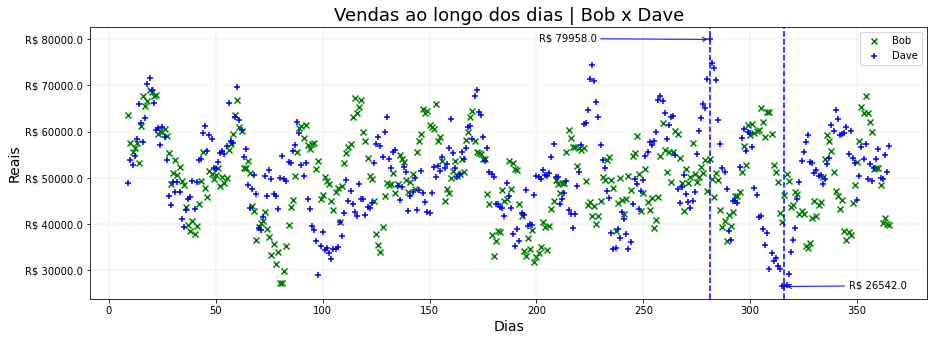

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("assets/salesman_pivot.csv")
bob = df["Bob"].rolling(10).sum().dropna()
dave = df["Dave"].rolling(10).sum().dropna()

fig, ax = plt.subplots(figsize=(15,5))
days = bob.index
ax.scatter(days, bob, color="g", label="Bob", marker='x')
ax.scatter(days, dave, color="b", label="Dave", marker='+')
ax.legend()
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set_title('Vendas ao longo dos dias | Bob x Dave', size=18)
ax.set_xlabel('Dias', size=14)
ax.set_ylabel('Reais', size=14)


day_max = dave.idxmax() if dave.max() > bob.max() else bob.idxmax()
color_day_max = 'blue' if dave.max() > bob.max() else 'green'
val_day_max = max([dave.max(), bob.max()])
ax.axvline(day_max, color=color_day_max, ls='dashed') # criando a linha vertical para o dia de venda maxima

max_annotation = ax.annotate(f"R$ {val_day_max}", # valor gerado para a notação
                             xy=(day_max, val_day_max), # posição para onde a anotação deve apontar
                             xytext=(day_max-80, val_day_max-500), # posição onde  fica o texto da anotação
                             arrowprops=dict(arrowstyle='->', color=color_day_max) # estilo da seta
                            )

day_min = dave.idxmin() if dave.min() < bob.min() else bob.idxmin()
color_day_min = 'blue' if dave.min() < bob.min() else 'green'
val_day_min = min([dave.min(), bob.min()])
ax.axvline(day_min, color=color_day_min, ls='dashed') # criando a linha vertical para o dia de venda maxima

min_annotation = ax.annotate(f"R$ {val_day_min}", # valor gerado para a notação
                             xy=(day_min, val_day_min), # posição para onde a anotação deve apontar
                             xytext=(day_min+30, val_day_min-500), # posição onde  fica o texto da anotação
                             arrowprops=dict(arrowstyle='->', color=color_day_min) # estilo da seta
                            )

fmt = StrMethodFormatter("R$ {x}") # criando um formatador para inserir R$ no eixo Y
ax.yaxis.set_major_formatter(fmt) # aplicando o formatodor

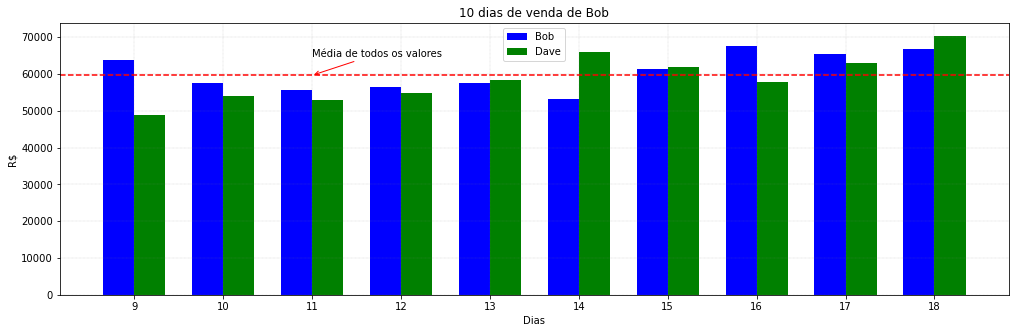

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("assets/salesman_pivot.csv")
bob = df["Bob"].rolling(10).sum().dropna()
dave = df["Dave"].rolling(10).sum().dropna()

# fig, ax = plt.subplots(figsize=(15,5))
# days = bob.index
# ax.bar(days, bob, label='Bob')
# ax.legend()

bob = bob[0:10]
dave = dave[0:10]
days = days[0:10]

# fig, ax = plt.subplots(figsize=(15,5))
# days = bob.index
# ax.bar(days, bob, label='Bob', color="b", width=0.7)
# ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
# ax.set(title="10 dias de venda de Bob", xlabel="Dias", ylabel="R$")
# ax.legend()

# ax.bar(days, dave, label='Dave', color="g", width=0.7)
# ax.legend()

fig, ax = plt.subplots(figsize=(17,5))
days = bob.index
sp = 0.5
width=0.35
ax.bar(days - (width/2), bob, label='Bob', color="b", width=0.35)
ax.bar(days + (width/2), dave, label='Dave', color="g", width=0.35)
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set(title="10 dias de venda de Bob", xlabel="Dias", ylabel="R$")
ax.set_xticks(days)
ax.legend()

avg = (np.mean(bob) + np.mean(dave)) / 2
ax.axhline(avg, color='red', ls='dashed')

mean_annotation = ax.annotate("Média de todos os valores",
                              xy=(11, avg),
                              xytext=(11, avg + 5000),
                              arrowprops=dict(arrowstyle='->', color='r'))

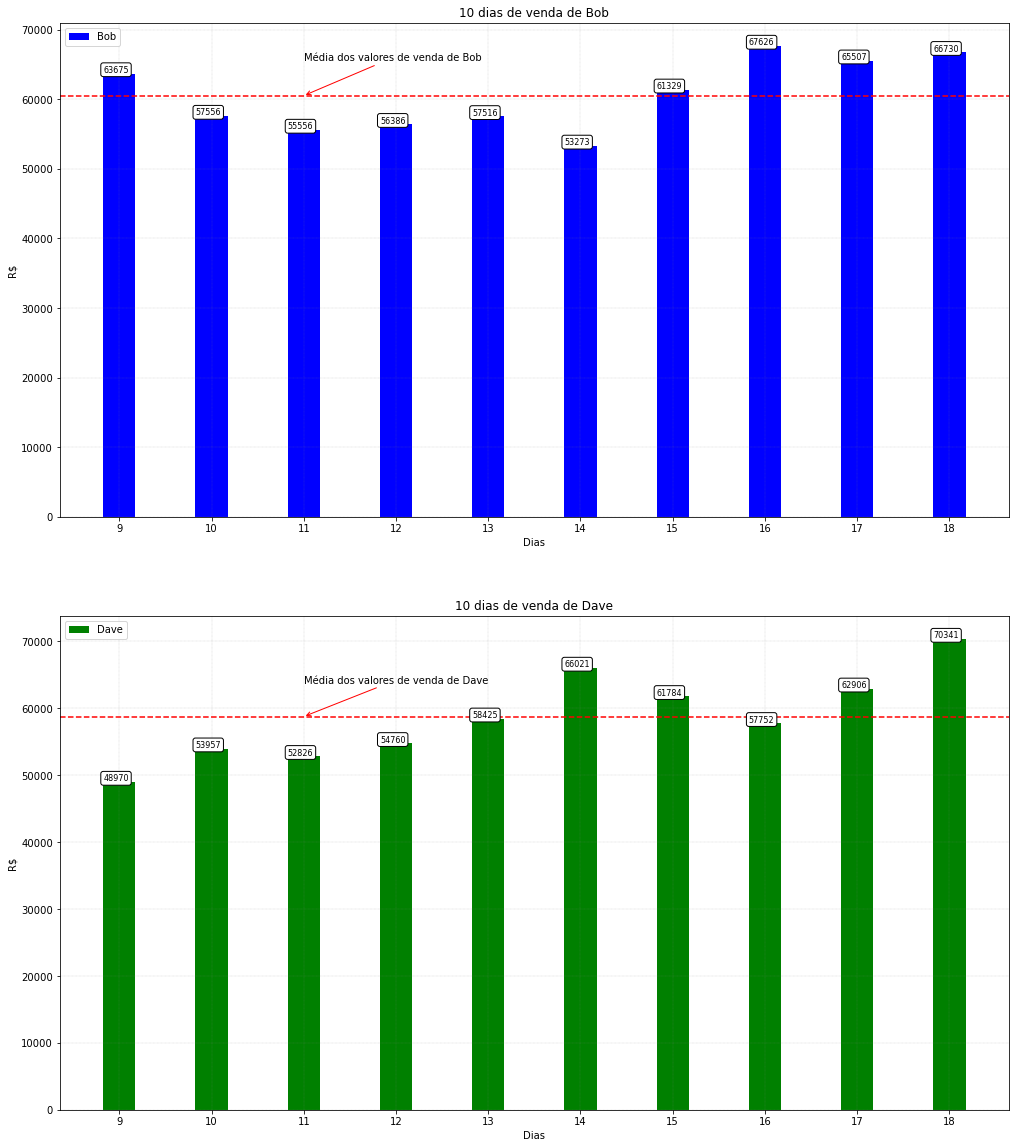

In [137]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("assets/salesman_pivot.csv")
bob = df["Bob"].rolling(10).sum().dropna()
dave = df["Dave"].rolling(10).sum().dropna()

# fig, ax = plt.subplots(figsize=(15,5))
# days = bob.index
# ax.bar(days, bob, label='Bob')
# ax.legend()

bob = bob[0:10]
dave = dave[0:10]
days = days[0:10]

# fig, ax = plt.subplots(figsize=(15,5))
# days = bob.index
# ax.bar(days, bob, label='Bob', color="b", width=0.7)
# ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
# ax.set(title="10 dias de venda de Bob", xlabel="Dias", ylabel="R$")
# ax.legend()

# ax.bar(days, dave, label='Dave', color="g", width=0.7)
# ax.legend()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(17,20))
days = bob.index
sp = 0.5
width=0.35

ax[0].bar(days, bob, label='Bob', color="b", width=0.35)
ax[0].grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax[0].set(title="10 dias de venda de Bob", xlabel="Dias", ylabel="R$")
ax[0].set_xticks(days)
ax[0].legend(loc="upper left")

ax[1].bar(days, dave, label='Dave', color="g", width=0.35)
ax[1].grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax[1].set(title="10 dias de venda de Dave", xlabel="Dias", ylabel="R$")
ax[1].set_xticks(days)
ax[1].legend(loc="upper left")

avg_bob = np.mean(bob)
avg_dave = np.mean(dave)
ax[0].axhline(avg_bob, color='red', ls='dashed')
ax[1].axhline(avg_dave, color='red', ls='dashed')

mean_annotation_bob = ax[0].annotate("Média dos valores de venda de Bob",
                              xy=(11, avg_bob),
                              xytext=(11, avg_bob + 5000),
                              arrowprops=dict(arrowstyle='->', color='r'))

mean_annotation_dave = ax[1].annotate("Média dos valores de venda de Dave",
                              xy=(11, avg_dave),
                              xytext=(11, avg_dave + 5000),
                              arrowprops=dict(arrowstyle='->', color='r'))


for p in ax[0].patches:
    an = ax[0].annotate(str(int(p.get_height())), (p.get_x(), p.get_height()+200))
    an.set_size(8)
    an.set_bbox(dict(facecolor='white', boxstyle='round',lw=1, edgecolor='k'))
    

for p in ax[1].patches:
    an = ax[1].annotate(str(int(p.get_height())), (p.get_x(), p.get_height()+200))
    an.set_size(8)
    an.set_bbox(dict(facecolor='white', boxstyle='round',lw=1, edgecolor='k'))


